In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Exploration

In [3]:
# Import libraries
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
# Read data
df = pd.read_csv('/kaggle/input/stores-area-and-sales-data/Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
# Basic info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


(896, 5)

## Data Preprocessing

In [6]:
# Check for null values
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [7]:
# Dropping columns irrelevant for this use case
df.drop(columns = 'Store ID ', inplace = True)

In [8]:
# Descriptive statistics
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [9]:
# Skewness
for i in df.columns:
    print(i, 'skewness:', df[i].skew())

Store_Area skewness: 0.030366862979232103
Items_Available skewness: 0.03443939172681748
Daily_Customer_Count skewness: 0.07463278790524851
Store_Sales skewness: 0.14879364291055253


In [10]:
# Correlation matrix
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


## Data Visualization

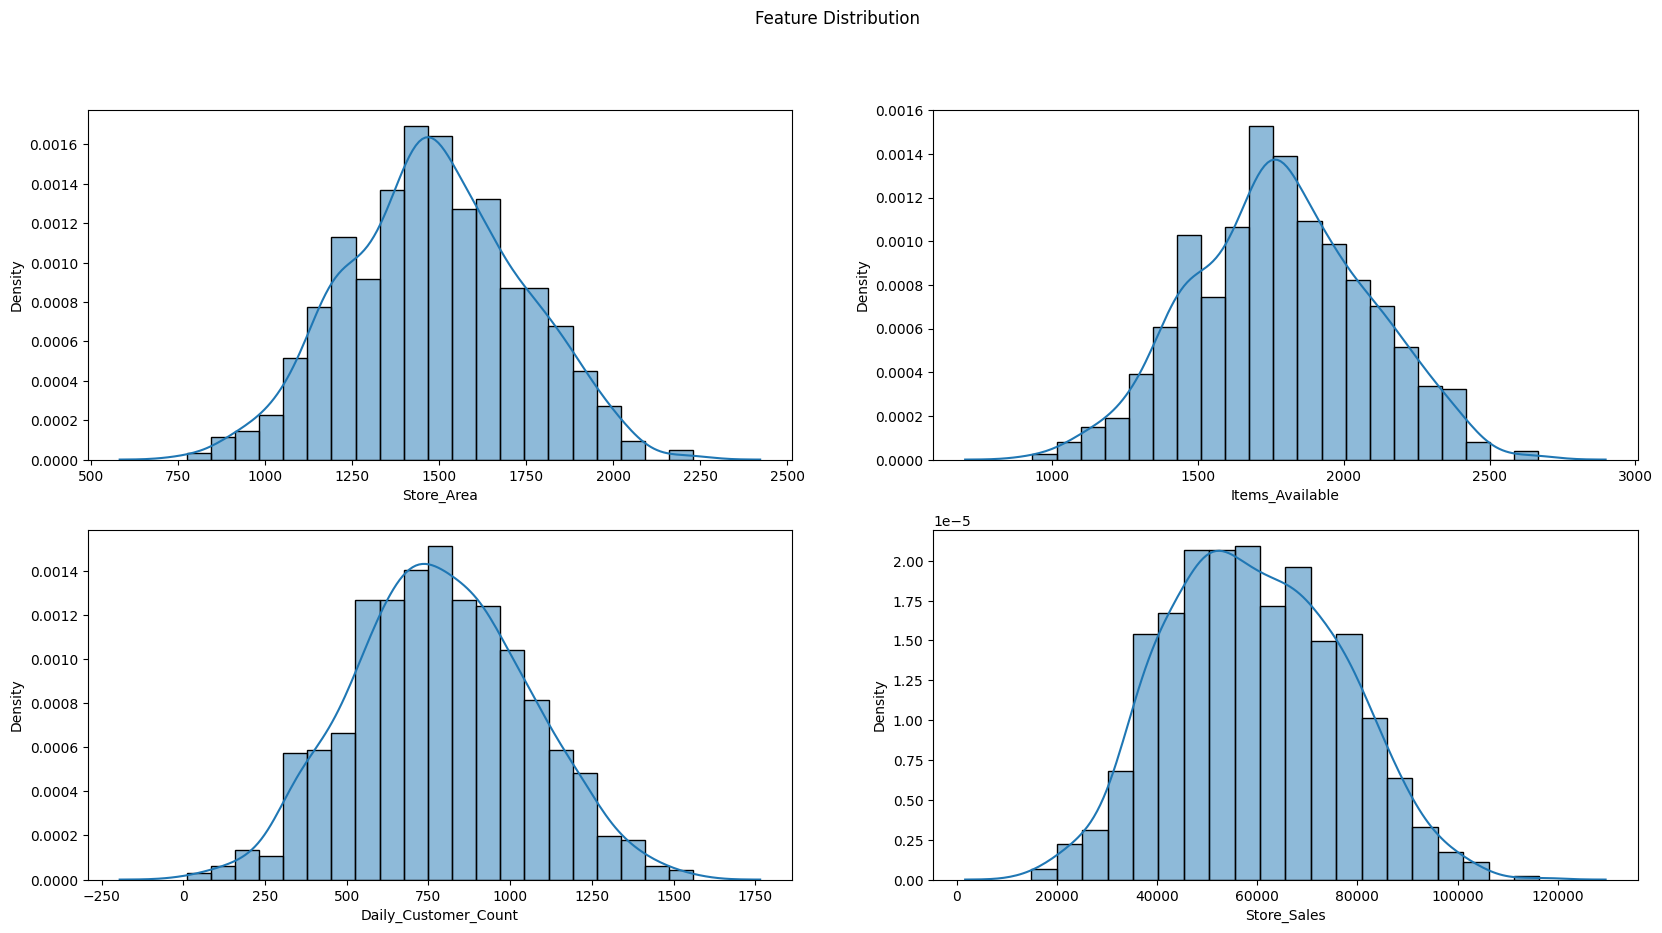

In [11]:
# Feature Distribution
plt.figure(figsize = (20, 10))
plt.suptitle('Feature Distribution')
plt.subplot(2, 2, 1)
sns.histplot(df["Store_Area"], kde = True, stat = "density",
             kde_kws = dict(cut = 3))
plt.subplot(2, 2, 2)
sns.histplot(df["Items_Available"], kde = True, stat = "density",
             kde_kws = dict(cut = 3))
plt.subplot(2, 2, 3)
sns.histplot(df["Daily_Customer_Count"], kde = True, stat = "density",
             kde_kws = dict(cut = 3))
plt.subplot(2, 2, 4)
sns.histplot(df["Store_Sales"], kde = True, stat = "density",
             kde_kws = dict(cut = 3))
plt.show()

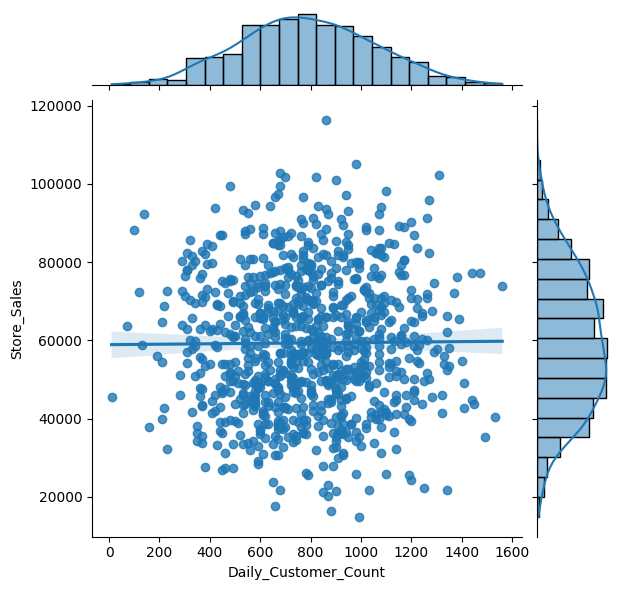

In [12]:
# Joint plot customer count against store sales
sns.jointplot(data = df, x = 'Daily_Customer_Count', y = 'Store_Sales',
              kind = 'reg')
plt.show()

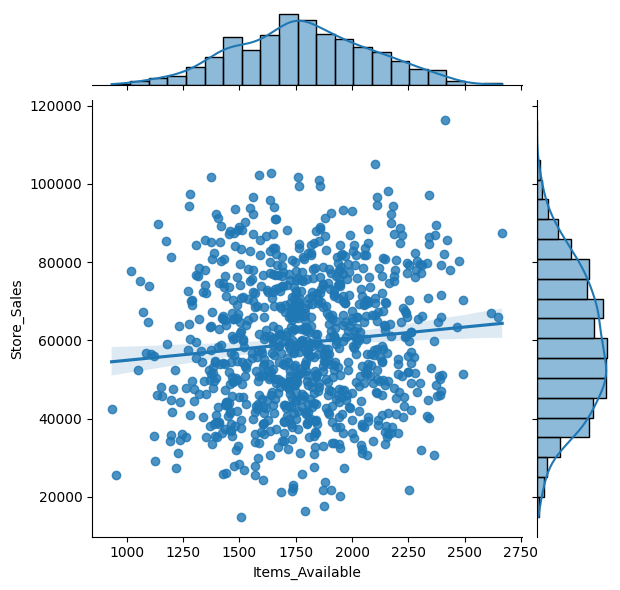

In [13]:
# Joint plot items available against store sales
sns.jointplot(data = df, x = 'Items_Available', y = 'Store_Sales',
              kind = 'reg')
plt.show()

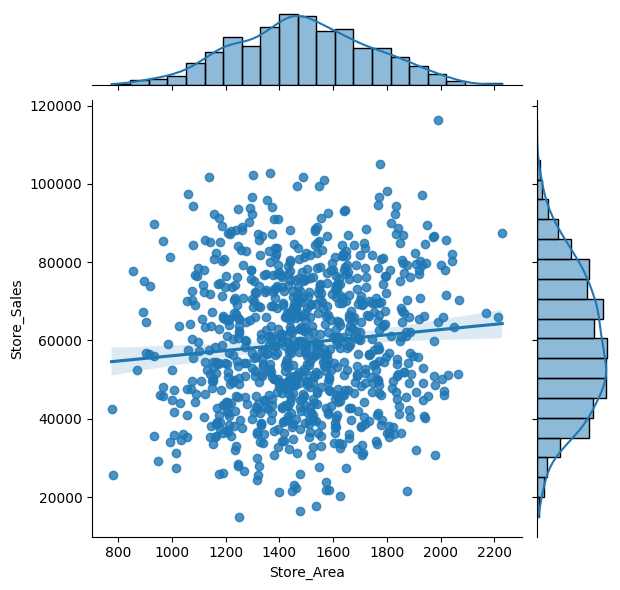

In [14]:
# Joint plot store area against store sales
sns.jointplot(data = df, x = 'Store_Area', y = 'Store_Sales',
              kind = 'reg')
plt.show()

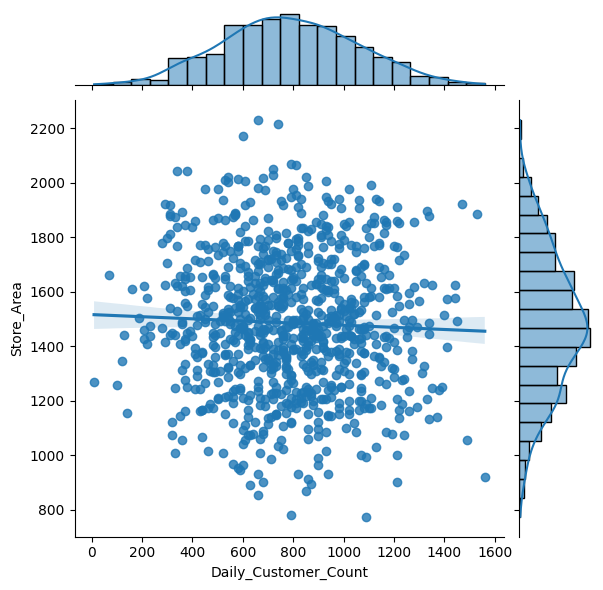

In [15]:
# Joint plot customer count against store area
sns.jointplot(data = df, x = 'Daily_Customer_Count', y = 'Store_Area',
              kind = 'reg')
plt.show()

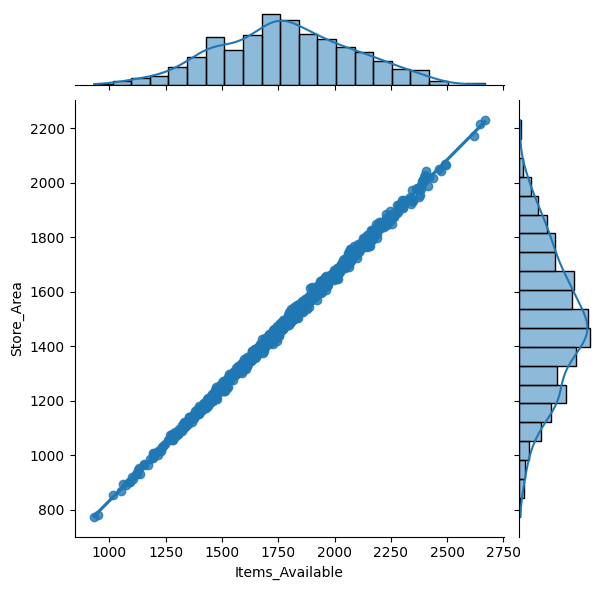

In [16]:
# Joint plot items available against store area
sns.jointplot(data = df, x = 'Items_Available', y = 'Store_Area',
              kind = 'reg')
plt.show()

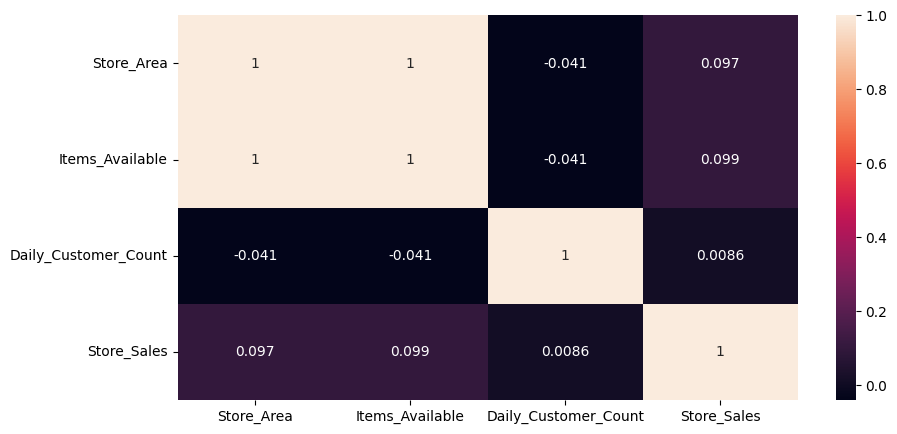

In [17]:
# Heatmap for visualizing feature correlations
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()

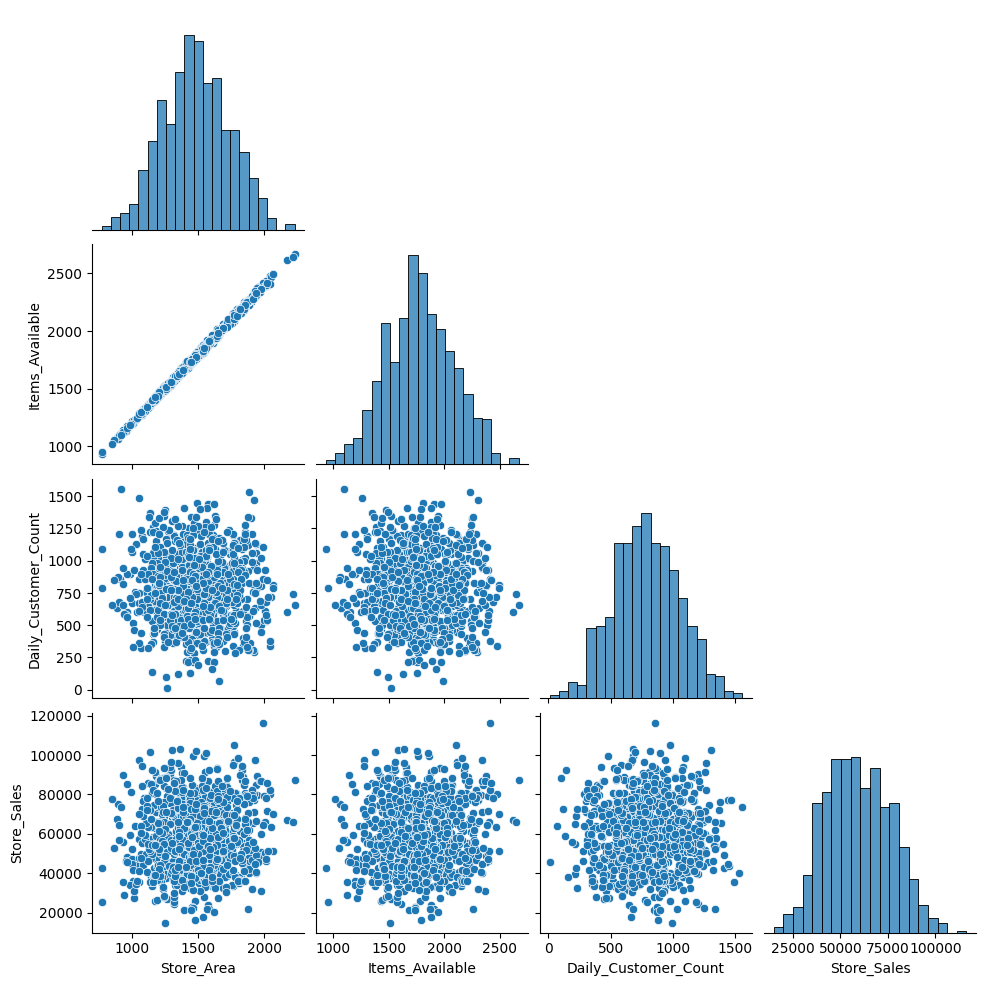

In [18]:
# Pair plot for pairwise relationships and distribution
sns.pairplot(df, corner = True)
plt.show()

In [19]:
# Scatter plots between store area and store sales
px.scatter(df, df.Store_Area, df.Store_Sales, color = 'Store_Sales',
           size = 'Store_Sales', color_continuous_scale = px.colors.sequential.Blues,
           title = 'Store Area vs Store Sales')

In [20]:
# Scatter plots between items available and store sales
px.scatter(df, df.Items_Available, df.Store_Sales, color = 'Store_Sales',
           size = 'Items_Available', color_continuous_scale = px.colors.sequential.Blues,
           title = 'Items Available vs Store Sales')

In [21]:
# Scatter plots between daily customer count and store sales
px.scatter(df, df.Daily_Customer_Count, df.Store_Sales, color = 'Store_Sales',
           size = 'Daily_Customer_Count', color_continuous_scale = px.colors.sequential.Blues,
           title = 'Daily Customer Count vs Store Sales')

In [22]:
# Scatter plots between items available and store area
px.scatter(df, x = 'Items_Available', y = 'Store_Area', trendline = 'ols',
           color_continuous_scale = px.colors.sequential.Blues,
           title = 'Items Available vs Store Area')

## Linear Regression Model

In [23]:
# Split data into features (x) and target variable (y)
x = df.drop('Store_Sales', axis = 1)
y = df['Store_Sales']

In [24]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [25]:
# Create copies of the original training and testing sets
x_train_bk = x_train.copy()
x_test_bk = x_test.copy()

In [26]:
# List columns to be scaled
cols = ['Store_Area', 'Items_Available', 'Daily_Customer_Count']

# Apply Min-Max Scaling to the specified columns in the training and testing set
mmscaler = MinMaxScaler(feature_range=(0, 1))
x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_test[cols] = mmscaler.fit_transform(x_test[cols])

# Convert back to DataFrame for easier correlation analysis
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [27]:
# Correlation matrix of original training set before scaling
x_train_bk.corr()

,Store_Area,Items_Available,Daily_Customer_Count
Store_Area,1.000000,0.998943,-0.026917
Items_Available,0.998943,1.000000,-0.028101
Daily_Customer_Count,-0.026917,-0.028101,1.000000


In [28]:
# Correlation matrix of scaled training set
x_train.corr()

,Store_Area,Items_Available,Daily_Customer_Count
Store_Area,1.000000,0.998943,-0.026917
Items_Available,0.998943,1.000000,-0.028101
Daily_Customer_Count,-0.026917,-0.028101,1.000000


In [29]:
# Fit the Linear Regression Model to the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# Predict the target variable (Store_Sales) on the test set using the trained model
y_pred = model.predict(x_test)

In [31]:
# Evaluation Metrics of MAE, MSE, RMSE, R2_score, RMSLE
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))

Mean Absolute Error (MAE): 14082.927
Mean Squared Error (MSE): 293534475.158
Root Mean Squared Error (RMSE): 17132.848
R2_score: 0.015729
Root Mean Squared Log Error (RMSLE): 9.749


In [32]:
# Calculate Mean Absolute Percentage Error (MAPE)
y_test, y_pred = np.array(y_test), np.array(y_pred)
result = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(round(result, 3)) + '%')

Mean Absolute Percentage Error (MAPE): 27.866%


In [33]:
# Calculate Adjusted R squared values 
r_squared = round(metrics.r2_score(y_test, y_pred), 6)
adjusted_r_squared = round(1 - (1 - r_squared) * (len(y) - 1) / (len(y) - x.shape[1] - 1), 6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.012419


In [34]:
# Create DataFrame to store actual and predicted sales
Results = pd.DataFrame({'Store_Sales_A': y_test, 'Store_Sales_P': y_pred})

# Merge two Dataframes on index of both the dataframes
ResultsFinal = df.merge(Results, left_index = True, right_index = True)
ResultsFinal.sample(10)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Sales_A,Store_Sales_P
265,1240,1492,940,66840,38620,57996.838899
246,1294,1539,790,78130,56480,61352.325781
24,1234,1488,840,41880,39030,60489.817403
175,1356,1619,700,42620,65970,59650.090202
204,1540,1857,1020,58260,54530,60373.188037
189,1666,2000,480,39730,46230,59858.757973
23,1449,1752,620,50680,59130,61074.109429
197,1504,1827,840,78230,73610,61390.056727
193,1751,2115,790,67360,88910,60304.433503
15,1644,1950,790,78870,92640,60464.040509


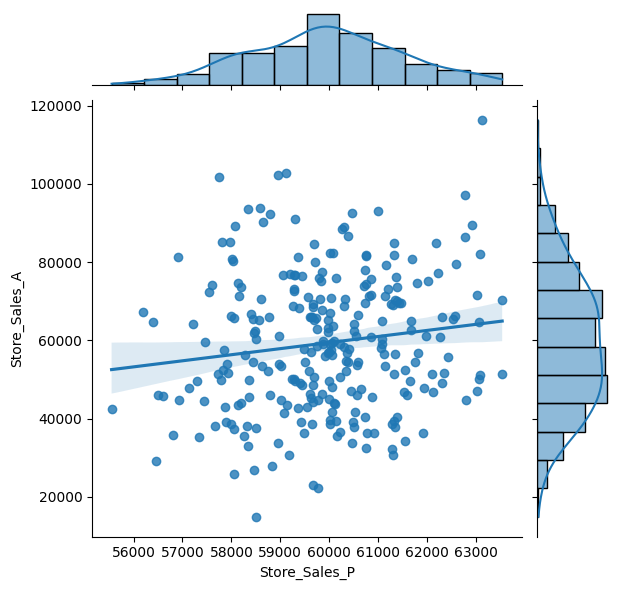

In [35]:
# Scatter plot with a regression line using Seaborn
sns.jointplot(data = Results, x = 'Store_Sales_P', y = 'Store_Sales_A',
              kind = 'reg')
plt.show()

In [36]:
# Scatter plot with a regression line using Plotly Express
px.scatter(Results, x = 'Store_Sales_P', y = 'Store_Sales_A',
           trendline = 'ols', title = 'Predicted Vs Actual Sales')